In [173]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
from scipy.stats import truncnorm
from matplotlib import pyplot

# Fake Data


### Classification Test Problems

#### Blobs Classification

In [185]:
from sklearn.datasets.samples_generator import make_blobs
def blob_classification_data(n_samples,n_features,centroids):
    X, y = make_blobs(n_samples=n_samples, centers=centroids, n_features=n_features)
    df=pd.DataFrame(X,y)
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
    plt.show()
    return df,X, y

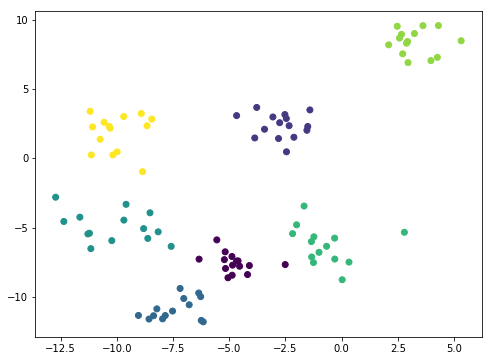

In [186]:
df, X, y=blob_classification_data(n_samples=100,n_features=7,centroids=7)

In [187]:
df.head()

,0,1,2,3,4,5,6
1,-3.056864,2.980484,-4.129054,-0.627127,8.470848,-8.274950,-0.168590
2,-8.220337,-10.865228,8.527190,-7.072727,0.571434,-2.857809,-7.515221
2,-6.155150,-11.800396,9.816550,-2.360241,1.383094,-2.859183,-6.932694
2,-6.244129,-11.695755,12.250401,-5.127832,3.267601,-1.606421,-5.712416
0,-5.164340,-7.949484,-10.036153,5.731432,4.293164,-3.924780,0.390304


#### Moons Classification

In [188]:
from sklearn.datasets import make_moons
def moon_classification_data(n_samples=100, noise=0.1):
    X, y = make_moons(n_samples=100, noise=0.1)
    df=pd.DataFrame(X,y)
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
    plt.show()
    return df,X, y

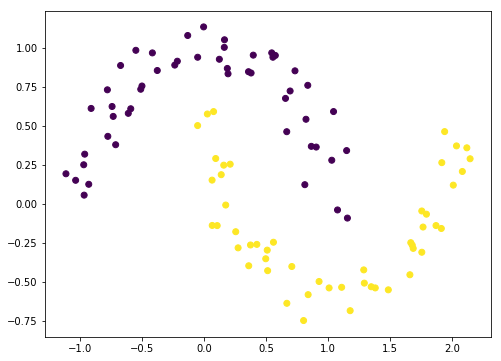

In [189]:
df,X, y=moon_classification_data(n_samples=100, noise=0.1)

In [190]:
from sklearn.datasets import make_circles
def circles_classification_data(n_samples=100, noise=0.1):
    X, y = make_circles(n_samples=100, noise=0.05)
    df=pd.DataFrame(X,y)
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
    plt.show()
    return df,X, y

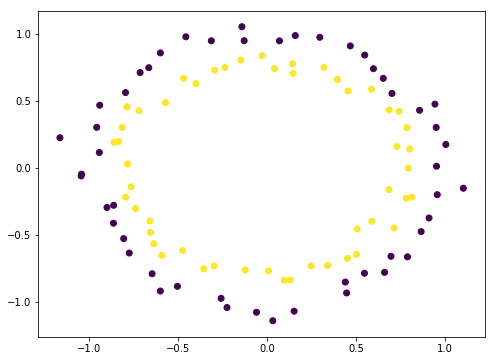

In [191]:
df,X, y=circles_classification_data(n_samples=100, noise=0.1)

### Regression Test Problems

In [213]:
from sklearn.datasets import make_regression
def regression_data(n_samples=100, noise=0.1):
    X, y = make_regression(n_samples=n_samples, n_features=1, noise=noise)
    df=pd.DataFrame(X,y)
    plt.figure(figsize=(8, 6))
    pyplot.scatter(X,y)
    plt.show()
    return df,X, y

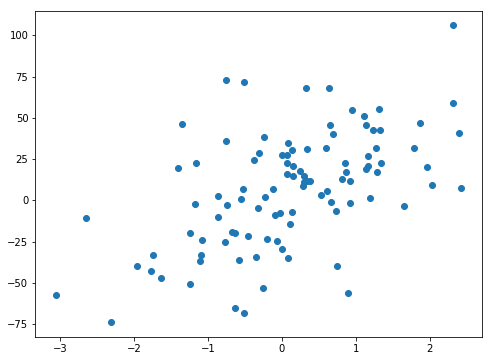

In [218]:
df,X, y=regression_data(n_samples=100, noise=30)

### Combine Data Types

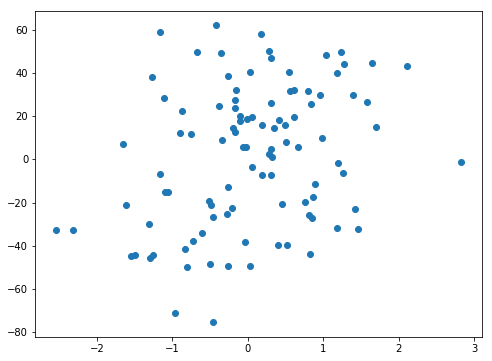

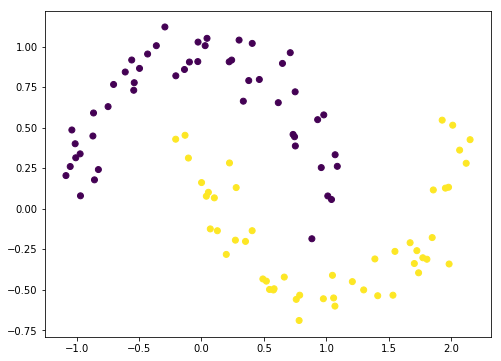

X_1 shape: (100, 1)
y_1 shape: (100, 1)
X_2 shape: (100, 1)
y_2 shape: (100, 2)


In [237]:
df_1,X_1, y_1=regression_data(n_samples=100, noise=30)
df_2,X_2, y_2=moon_classification_data(n_samples=100, noise=0.1)

print('X_1 shape:',np.shape(X_1))
print('y_1 shape:',np.shape(X_1))
print('X_2 shape:',np.shape(X_1))
print('y_2 shape:',np.shape(X_2))

In [292]:
def combine_fake_data(X_1,X_2,y_1,y_2):
    X_3=np.hstack((X_1, X_2))
    y_3=np.vstack((y_1, y_2)).T
    df_3=pd.DataFrame(np.hstack((X_3, y_3)))
    pyplot.scatter(df_3[0],df_3[3])
    return X_3,y_3,df_3

In [294]:
X_3,y_3,df_3=combine_fake_data(X_1,X_2,y_1,y_2)

TypeError: combine_fake_data() takes 0 positional arguments but 4 were given

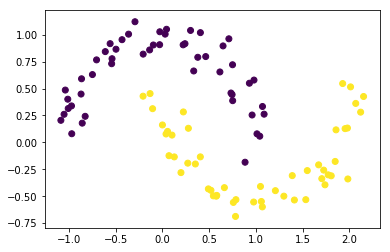

In [276]:
plt.scatter(df_3[1], df_3[2], c=df_3[4])
plt.show()

### Dimension Reduction for Mixed Data Types

In [289]:
from sklearn.decomposition import PCA
def viz_pca(X,components=2):
    pca = PCA(n_components=2, whiten=True).fit(X)
    print('Orthogonal Vectors:',pca.components_,'\n')
    print('Variance Retained:',sum(pca.explained_variance_ratio_))
    X_pca = pca.transform(X)
    pyplot.scatter(X[:,0], X[:,1])  
    return X_pca

Orthogonal Vectors: [[-8.89800269e-03 -2.16843095e-04  2.76853708e-03 -9.99955739e-01
  -1.27851938e-03]
 [-1.73768517e-01 -8.47945094e-01  3.35441761e-01  3.13428603e-03
  -3.71836822e-01]] 

Variance Retained: 0.9989280977764781


,0,1,2,3,4
0,1.187598,-0.864387,0.591139,40.027561,0.0
1,-0.362578,0.241629,0.917427,49.169351,0.0
2,1.240282,0.277883,0.131061,49.620430,1.0
3,-1.551795,0.000601,0.161950,-44.693009,1.0
4,-1.272057,1.533143,-0.532505,37.867735,1.0


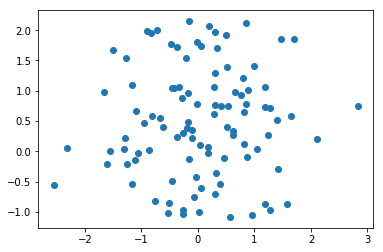

In [291]:
X_pca=viz_pca(df_3.values,components=2)
df_3.head()